#Some Conclusions & Explnation based on following Analysis. Please read This and then look after Code Analysis.

1. AOV is calculated by simply dividing the total revenue by the number of orders and is used by businesses to understand how much each customer will spend on average.

2. The purpose of this study is to identify customer average spending for a sneaker assuming each shop sells only one shoe model at a reasonable price.

3. Considering a naive AOV of 3145 Dollar , show purchases may be more expensive. An AOV appears to be derived by averaging the order values of 100 shops. That is not the right way to conclude anything about a specific store directly, because if we see only 2 shops ( SHOP_ID: 42 & 78) contributing to this near about 60-65% and remaning 98 shops contributing 35-40%. 

4. Our AOV fell to $3136.83 when we used the AOV per shop and then the average. As these are still higher prices for sneaker orders, I did further analysis to identify anomalies (shop_id=42 with reasonable orders and shop_id=78 selling sneakers at absurd prices that probabily seem fraudulent).

5. AOV per shop can be better measured with metrics like median or mode in such cases, since they are less influenced by extreme values. 

6. Because we are looking at 100 shops, we should get a more accurate representation of orders (mode) based on the most frequent prices. 

7. so with over all dataset we got AOV values

Mean AOV: 3136.834087887025

Median AOV: 308.8897584973166

Mode AOV: 162.85714285714286

8. and without shop 42 & 78 I got:

Mean AOV: 299.68239912615485

Median AOV: 308.8276955602537

Mode AOV: 162.85714285714286



Since median and mean are not greatly different in 2nd case, I will choose Mean. 
After removing the contribution from the big dominated shops, the average value gives us more reasonable AOV. 
Even so, the mean value falls close to the median which is the same in both cases. & We can see after removing 2 shops still data of total revenue is slightle skewed towards lower values or we can say left side. Taking the mean value here would be a better choice.




##1c. Its value is $299.68.
Approx(300)

###In real life, however, ignoring shop 42 & 78 would not be a good idea. For understanding the overall impact of a strategy, we need to take into account both matrices. But to understand the behavior of all shops, we need to consider the matrix without taking into account those 2 shops.


In [ ]:

#Manipulate file
import os

# Numerical/Dataframe libraries
import pandas as pd 
import numpy as np

# Vizualizing NaN values
import missingno as msno

#Geolocalisation
import folium

#Vizualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the dataset, we read it using pandas

In [ ]:
path= '/content/2019 Winter Data Science Intern Challenge Data Set.csv'
#Read the dataset
shopify_df= pd.read_csv(path)

In [ ]:
shopify_df.head(15).style.background_gradient(cmap='GnBu')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


In [ ]:
shopify_df.tail(15).style.background_gradient(cmap='GnBu')

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
4985,4986,8,916,396,3,debit,2017-03-15 14:22:51
4986,4987,100,731,111,1,cash,2017-03-30 7:01:59
4987,4988,11,826,184,1,credit_card,2017-03-02 9:35:25
4988,4989,86,877,260,2,cash,2017-03-12 19:55:36
4989,4990,11,843,552,3,credit_card,2017-03-02 15:06:29
4990,4991,24,860,140,1,cash,2017-03-26 0:32:39
4991,4992,61,707,158,1,cash,2017-03-13 18:56:04
4992,4993,49,739,258,2,debit,2017-03-24 13:48:08
4993,4994,4,834,384,3,debit,2017-03-18 4:12:20
4994,4995,12,954,201,1,cash,2017-03-22 0:38:11


Data Preprocessing

We found out how many rows and columns and if there is any missing values.

In [ ]:
shape=shopify_df.shape
print(f'The dataset contains {shape[0]} rows and {shape[1]} columns')

The dataset contains 5000 rows and 7 columns


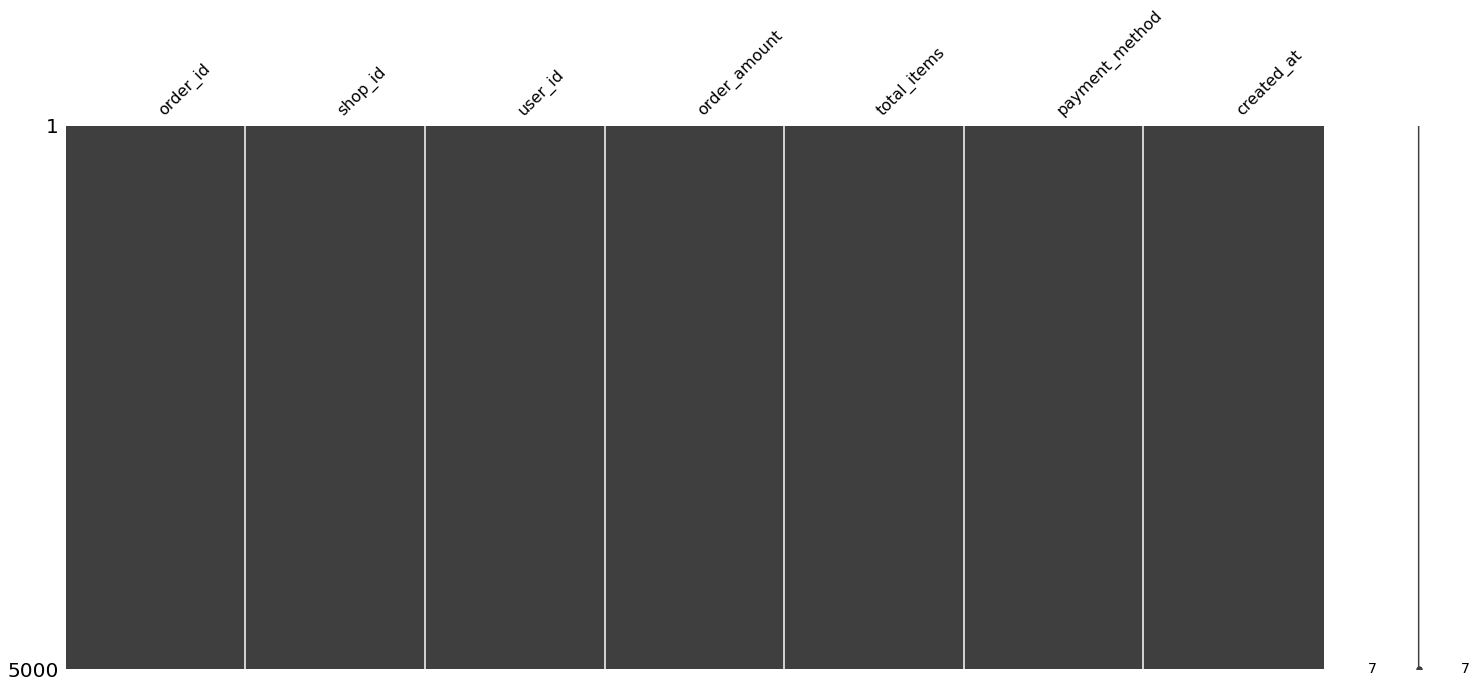

In [ ]:
#Visualize the nan values in each columns
msno.matrix(shopify_df);

In [ ]:
shopify_df.duplicated().sum()

0

So No Duplicate entry in Dataset

In [ ]:
print("Total Unique Days in Dataset are",len(shopify_df['day'].unique()))

Total Unique Days in Dataset are 30


In [ ]:
print("Total Unique Shops in Dataset are",len(shopify_df['shop_id'].unique()))

Total Unique Shops in Dataset are 100


In [ ]:
print("Total Unique users in Dataset are",len(shopify_df['user_id'].unique()))

Total Unique users in Dataset are 301


In [ ]:
# First determine respective sums of both 'order_amount' and 'total_items'
oa_sum = shopify_df['order_amount'].sum()
ti_sum = shopify_df['total_items'].sum()
print("Total Order Amont",oa_sum)
print("Total Items sold",ti_sum)
print('Total Orders',len(shopify_df['order_id'].unique()))

Total Order Amont 15725640
Total Items sold 43936
Total Orders 5000


In [ ]:
TAmount = shopify_df['order_amount'].sum()
orders = len(shopify_df['order_id'].unique())
aov = TAmount/orders
print("Total AOV according to calculation steps given by question is" ,aov)

Total AOV according to calculation steps given by question is 3145.128


In [ ]:
shopify_df[["total_items", "order_amount"]].describe()

,total_items,order_amount
count,5000.00000,5000.000000
mean,8.78720,3145.128000
std,116.32032,41282.539349
min,1.00000,90.000000
25%,1.00000,163.000000
50%,2.00000,284.000000
75%,3.00000,390.000000
max,2000.00000,704000.000000


The amount order shows there are huge differences between mean and maximum values, and even between min and maximum values.

#Let's examine the relationship between Orders, Shops & Days of the month 

In [ ]:
modified_df=shopify_df.copy()

# Convert date columns into date time 
shopify_df.created_at = pd.to_datetime(shopify_df.created_at)
#Add a month,day and weekday columns
shopify_df['month']=shopify_df.created_at.dt.month
shopify_df['day']=shopify_df.created_at.dt.day
shopify_df['weekday']=shopify_df.created_at.dt.day_name()


In [ ]:
#Add a hour and minute columns 
shopify_df['hour']=shopify_df.created_at.dt.hour
shopify_df['minute']=shopify_df.created_at.dt.minute
#Make it int values
shopify_df['hour']=pd.to_numeric(shopify_df['hour'])
shopify_df['minute']=pd.to_numeric(shopify_df['minute'])

In [ ]:
shopify_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,month,day,weekday,hour,minute
0,1,53,746,224,2,cash,2017-03-13 12:36:56,3,13,Monday,12,36
1,2,92,925,90,1,cash,2017-03-03 17:38:52,3,3,Friday,17,38
2,3,44,861,144,1,cash,2017-03-14 04:23:56,3,14,Tuesday,4,23
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,3,26,Sunday,12,43
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,3,1,Wednesday,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,3,30,Thursday,13,47
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,3,16,Thursday,20,36
4997,4998,56,867,351,3,cash,2017-03-19 05:42:42,3,19,Sunday,5,42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,3,16,Thursday,14,51


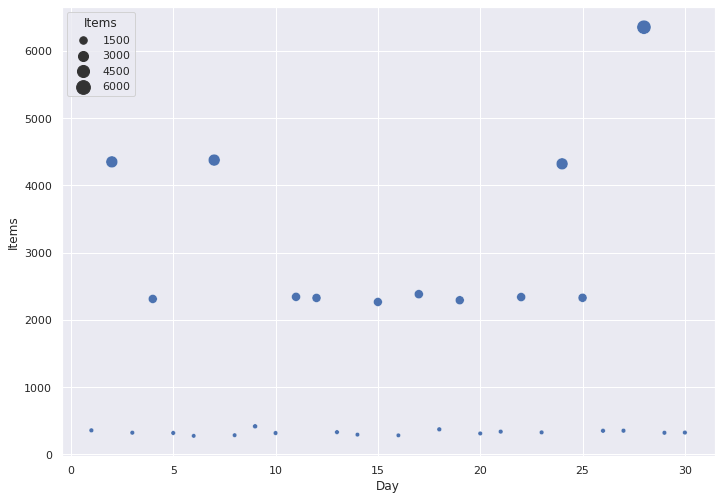

In [ ]:
#Parameters for plotting 
sale=shopify_df.groupby('day').sum()['total_items']
day = [i for i in range(1,31)]
sale_df = pd.DataFrame(list(zip(day,sale)),columns=['Day','Items'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=sale_df, x="Day", y="Items",size='Items', sizes=(20, 200))


In [ ]:
s=shopify_df.groupby('shop_id').sum()
s

,order_id,user_id,order_amount,total_items,month,day,hour,minute
shop_id,,,,,,,,
1,110641,36679,13588,86,132,708,552,1299
2,126448,47370,9588,102,165,832,628,1602
3,110682,40690,14652,99,144,789,512,1429
4,140128,44189,13184,103,153,908,603,1459
5,112423,38800,13064,92,135,750,437,1254
...,...,...,...,...,...,...,...,...
96,127305,44136,16830,110,153,693,586,1656
97,120413,40542,15552,96,144,723,506,1389
98,143310,50274,14231,107,174,944,589,1900


In [ ]:
sale=shopify_df.groupby('shop_id').sum()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=shopify_df, x="total_items", y="order_amount",size='order_amount', hue='total_items' sizes=(20, 200))


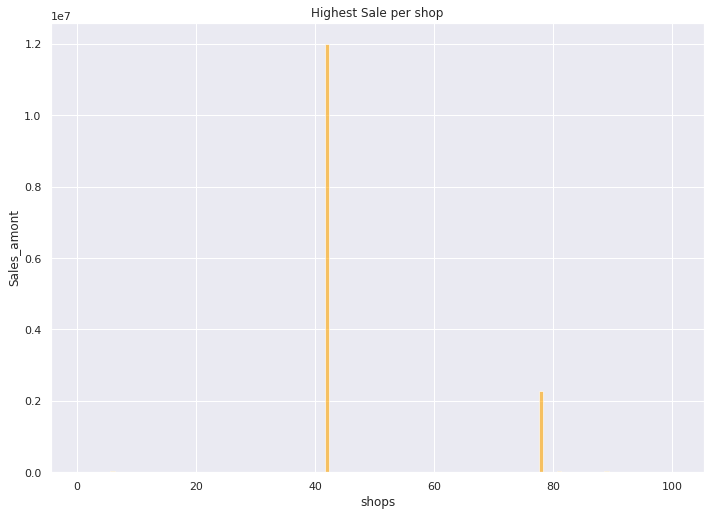

In [ ]:
#Parameter for plotting 
sale=shopify_df.groupby('shop_id').sum()['order_amount'] #Y-values
shops=[shop for shop, shopify_df in shopify_df.groupby('shop_id')] #X-values

# Plot
plt.bar(shops,sale,color='orange',alpha=.6)
plt.xlabel('shops')
plt.ylabel('Sales_amont')
plt.title('Highest Sale per shop')
plt.show()

In [ ]:
[ x for x in sale if x > 20000]

[22627,
 21760,
 20538,
 11990176,
 21538,
 20241,
 21320,
 2263800,
 22656,
 20196,
 23128]

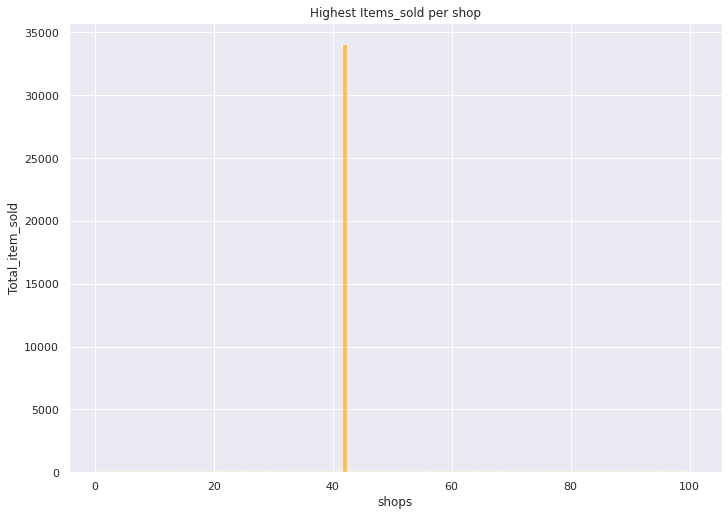

In [ ]:
#Parameter for plotting 
item_sold=shopify_df.groupby('shop_id').sum()['total_items'] #Y-values
shops=[shop for shop, shopify_df in shopify_df.groupby('shop_id')] #X-values

# Plot
plt.bar(shops,item_sold,color='orange',alpha=.6)
plt.xlabel('shops')
plt.ylabel('Total_item_sold')
plt.title('Highest Items_sold per shop')
plt.show()

In [ ]:
[ x for x in item_sold if x > 5000]

[34063]

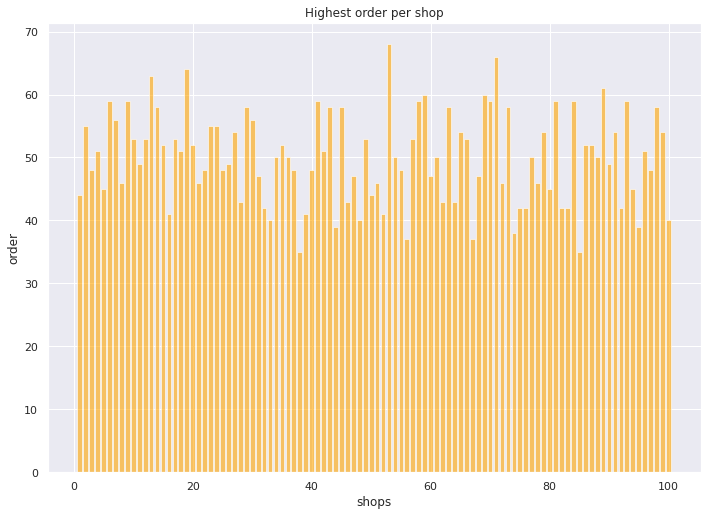

In [ ]:
#Parameter for plotting 
order=shopify_df.groupby('shop_id').count()['order_id'] #Y-values
shops=[shop for shop, shopify_df in shopify_df.groupby('shop_id')] #X-values

# Plot
plt.bar(shops,order,color='orange',alpha=.6)
plt.xlabel('shops')
plt.ylabel('order')
plt.title('Highest order per shop')
plt.show()

According to the three graphs above, 11 shops sold more than $20000 worth of goods. Two shops sold more than 1,0000000 dollars goods. However, only one shop sold more than 5000 items, which is 34063 items. If you look at the graph of total orders, all shops received almost the same amount of orders, less or more than the range of 10. 

Hence, we can conclude that two shops contribute more to the AOV than any other shop out of 100.

In [ ]:
shop_42 = shopify_df[shopify_df['shop_id']==42]


In [ ]:
shop_42

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,month,day,weekday,hour,minute
15,16,42,607,704000,2000,credit_card,2017-03-07 04:00:00,3,7,Tuesday,4,0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,3,24,Friday,14,15
60,61,42,607,704000,2000,credit_card,2017-03-04 04:00:00,3,4,Saturday,4,0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,3,11,Saturday,18,14
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,3,4,Saturday,14,32
520,521,42,607,704000,2000,credit_card,2017-03-02 04:00:00,3,2,Thursday,4,0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,3,25,Saturday,21,31
835,836,42,819,704,2,cash,2017-03-09 14:15:15,3,9,Thursday,14,15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,3,13,Monday,23,43
979,980,42,744,352,1,debit,2017-03-12 13:09:04,3,12,Sunday,13,9


In [ ]:
shop_78 = shopify_df[shopify_df['shop_id']==78]

In [ ]:
shop_78


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,month,day,weekday,hour,minute
160,161,78,990,25725,1,credit_card,2017-03-12 05:56:57,3,12,Sunday,5,56
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,3,26,Sunday,17,8
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,3,16,Thursday,21,39
511,512,78,967,51450,2,cash,2017-03-09 07:23:14,3,9,Thursday,7,23
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,3,18,Saturday,11,18
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,3,27,Monday,22,51
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,3,15,Wednesday,10,16
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,3,16,Thursday,16,38
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,3,17,Friday,22,32
1259,1260,78,775,77175,3,credit_card,2017-03-27 09:27:20,3,27,Monday,9,27


In [ ]:
shop_78[['order_amount',	'total_items']].describe()

,order_amount,total_items
count,46.000000,46.000000
mean,49213.043478,1.913043
std,26472.227449,1.029047
min,25725.000000,1.000000
25%,25725.000000,1.000000
50%,51450.000000,2.000000
75%,51450.000000,2.000000
max,154350.000000,6.000000


In [ ]:
shop_42[['order_amount',	'total_items']].describe()

,order_amount,total_items
count,51.000000,51.000000
mean,235101.490196,667.901961
std,334860.641587,951.308641
min,352.000000,1.000000
25%,352.000000,1.000000
50%,704.000000,2.000000
75%,704000.000000,2000.000000
max,704000.000000,2000.000000


In [ ]:
print("order Amount of shop 78 are",shop_78['order_amount'].sum())
print("order Amont of shop 42 are",shop_42['order_amount'].sum())

order Amount of shop 78 are 2263800
order Amont of shop 42 are 11990176


In [ ]:
print("orders of shop 78 are",shop_78['order_id'].count())
print("orders of shop 42 are",shop_42['order_id'].count())

orders of shop 78 are 46
orders of shop 42 are 51


We can conclude from these tables that shop_Id 78 is the most expensive. 25725 is the price of one item.

Meanwhile, 42 shop had balance while 78 shop did not.

AOV of shop 78 is = 2263800 / 46  = 49213.04


AOV of shop 42 is = 11990176 / 51 = 235101.49

So now calculate AOV per individual shop

In [ ]:
# Get total Revenue per Shop
revenue_by_shop = shopify_df.groupby(['shop_id'])['order_amount'].agg('sum')
revenue_by_shop.name ='TotalRevenue'

# Get Total Orders per shop
orders_by_shop = shopify_df.groupby(['shop_id'])['order_id'].agg('count')
orders_by_shop.name = 'TotalOrders'

# Calculate AOV per shop
df_shop = pd.concat([revenue_by_shop, orders_by_shop], axis=1)
aov_shopid = df_shop['TotalRevenue']/df_shop['TotalOrders']


aov_shopid.name = 'AOV_PerShop'
df_shop = pd.concat([revenue_by_shop, orders_by_shop , aov_shopid], axis=1)
df_shop

,TotalRevenue,TotalOrders,AOV_PerShop
shop_id,,,
1,13588,44,308.818182
2,9588,55,174.327273
3,14652,48,305.250000
4,13184,51,258.509804
5,13064,45,290.311111
...,...,...,...
96,16830,51,330.000000
97,15552,48,324.000000
98,14231,58,245.362069


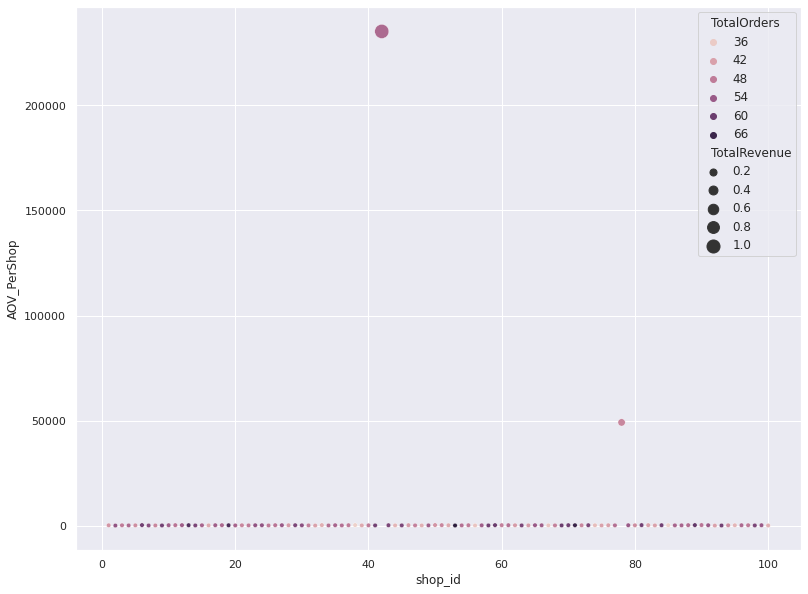

In [ ]:
sns.set(rc={'figure.figsize':(13,10)})
sns.scatterplot(data=df_shop, x="shop_id", y="AOV_PerShop",hue='TotalOrders',size='TotalRevenue', sizes=(20, 200))

In [ ]:
df_shop['shop_id'] = [i for i in range(1,101)]

In [ ]:
df_shop[df_shop['shop_id'] == 78]

,TotalRevenue,TotalOrders,AOV_PerShop,shop_id
shop_id,,,,
78,2263800,46,49213.043478,78


In [ ]:
df_shop[df_shop['shop_id'] == 42]

,TotalRevenue,TotalOrders,AOV_PerShop,shop_id
shop_id,,,,
42,11990176,51,235101.490196,42


In [ ]:
df_shop[['TotalRevenue',	'TotalOrders',	'AOV_PerShop']].describe()

,TotalRevenue,TotalOrders,AOV_PerShop
count,1.000000e+02,100.000000,100.000000
mean,1.572564e+05,50.000000,3136.834088
std,1.216218e+06,7.287737,23935.881130
min,6.840000e+03,35.000000,162.857143
25%,1.293050e+04,44.750000,263.675962
50%,1.488750e+04,50.000000,308.889758
75%,1.760000e+04,55.000000,336.628352
max,1.199018e+07,68.000000,235101.490196


#Mean AOV is 3136.834088$
Even so, 3136.834088 is still a high number compared to normal, however we can observe that the minimum AOV is 162.86
There is a maximum of 235101.49.

The AOV value I will report is the median. Due to the robustness of the median in the face of outliers, the AOV is clearly impacted by the mean. 

One other metric you could report is the mode, since that is the number where the most shops are standing.


In [ ]:
print("Mean AOV:",df_shop['AOV_PerShop'].mean())
print("Median AOV:",df_shop['AOV_PerShop'].median())
print("Mode AOV:",df_shop['AOV_PerShop'].mode()[0])

Mean AOV: 3136.834087887025
Median AOV: 308.8897584973166
Mode AOV: 162.85714285714286


lets check results after dropping 2 bigger shops

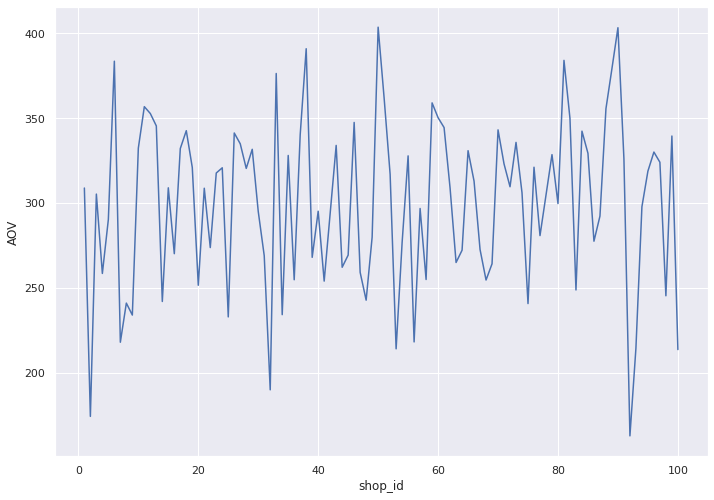

In [ ]:

df_shop_new = df_shop.drop([78,42])
plt.ylabel('AOV')
df_shop_new['AOV_PerShop'].plot()

In [ ]:
print("Mean AOV:",df_shop_new['AOV_PerShop'].mean())
print("Median AOV:",df_shop_new['AOV_PerShop'].median())
print("Mode AOV:",df_shop_new['AOV_PerShop'].mode()[0])

Mean AOV: 299.68239912615485
Median AOV: 308.8276955602537
Mode AOV: 162.85714285714286


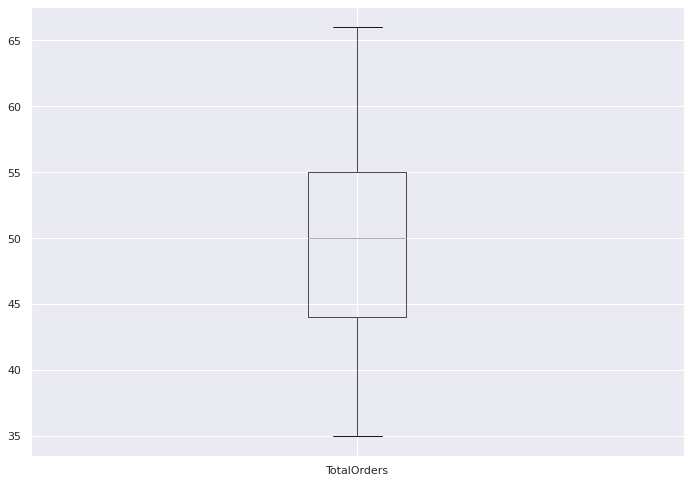

In [ ]:
q1 = df_shop_new.TotalOrders.quantile(q=0.25)
q2 = df_shop_new.TotalOrders.quantile(q=0.5)
q3 = df_shop_new.TotalOrders.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df_shop_new[(df_shop_new.TotalOrders < q2 + IQR * 1.5) & (df_shop_new.TotalOrders > q2 - IQR * 1.5)]
df_truncated.boxplot(column='TotalOrders')

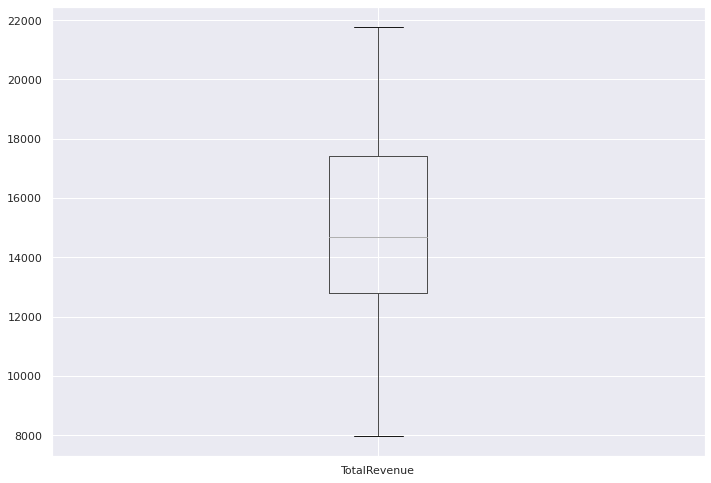

In [ ]:
q1 = df_shop_new.TotalRevenue.quantile(q=0.25)
q2 = df_shop_new.TotalRevenue.quantile(q=0.5)
q3 = df_shop_new.TotalRevenue.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df_shop_new[(df_shop_new.TotalRevenue < q2 + IQR * 1.5) & (df_shop_new.TotalRevenue > q2 - IQR * 1.5)]
df_truncated.boxplot(column='TotalRevenue')

Total Revenue is slighlty skewed towards left.

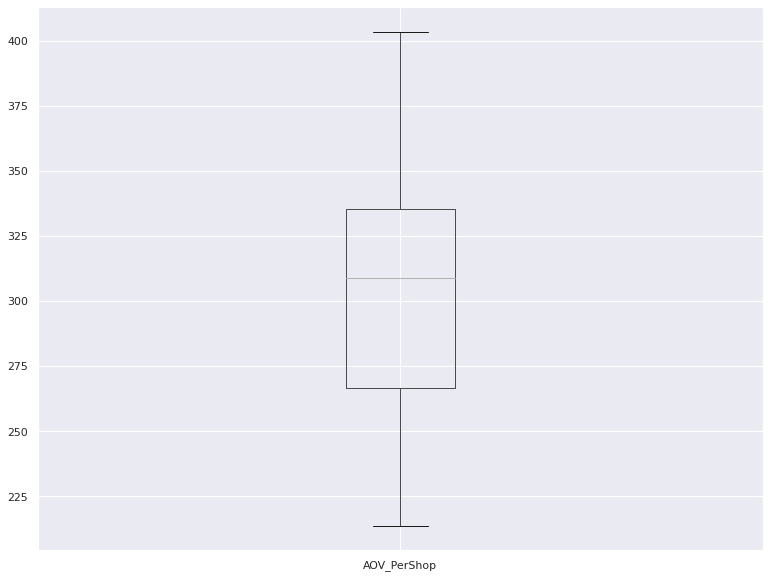

In [ ]:
q1 = df_shop_new.AOV_PerShop.quantile(q=0.25)
q2 = df_shop_new.AOV_PerShop.quantile(q=0.5)
q3 = df_shop_new.AOV_PerShop.quantile(q=0.75)
IQR = q3 - q1

df_truncated = df_shop_new[(df_shop_new.AOV_PerShop < q2 + IQR * 1.5) & (df_shop_new.AOV_PerShop > q2 - IQR * 1.5)]
df_truncated.boxplot(column='AOV_PerShop')

AOV skewwed towards right / towards higher values

In [ ]:
len(df_shop_new[df_shop_new['AOV_PerShop'] > 308]), len(df_shop_new[df_shop_new['AOV_PerShop'] <308])

(51, 47)

* Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

##1. How many orders were shipped by Speedy Express in total?
Answer: 54

SELECT count(DISTINCT orderID) FROM orders o
inner join shippers s
on o.shipperid = s.shipperid
where s.ShipperName = "Speedy Express”

ANSWER: 54

##2.  What is the last name of the employee with the most orders?


SELECT LastName 
from orders o join employees e
on o.employeeID = e.employeeID
group by o.employeeID
order by count(o.OrderID) desc
limit 1

ANSWER: Peacock

##3. What product was ordered the most by customers in Germany?
Answer: Boston Crab Meat

select p.ProductName from OrderDetails d
join Orders o
on d.OrderID = o.OrderID
join Customers c
on o.CustomerID = c.CustomerID
join Products p
on p.ProductID = d.ProductID
where c.country = "Germany"
group by p.productID
order by sum(quantity) desc
limit 1

ANSWER : Boston Crab Meat